In [1]:
import pandas as pd 
df = pd.read_csv('loan_data_set.csv')

In [2]:
df

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Y
...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Y
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Y
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Y
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Y


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(7)
memory usage: 57.7+ KB


In [4]:

df.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


In [5]:
#  convert labels to numbers 
df['Dependents']=df['Dependents'].apply(lambda x : 0 if x =='0' else 1 if x == '1' else 2 if x == 2 else 3 if x == '3+' else None  )
df['Loan_Status']=df['Loan_Status'].apply(lambda x : 1 if x == 'Y' else 0) 
df['Gender']=df['Gender'].apply(lambda x : 1 if x == 'Male' else 0 if x == "Female" else None )
df['Married']=df['Married'].apply(lambda x : 1 if x == 'Yes' else 0 if x == "No" else None)
df['Education']=df['Education'].apply(lambda x : 1 if x == 'Graduate' else 0)
df['Self_Employed']=df['Self_Employed'].apply(lambda x : 1 if x == 'Yes' else 0 if x == 'No' else None)



In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    float64
 2   Married            611 non-null    float64
 3   Dependents         498 non-null    float64
 4   Education          614 non-null    int64  
 5   Self_Employed      582 non-null    float64
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Loan_Status        614 non-null    int64  
dtypes: float64(8), int64(3), object(1)
memory usage: 57.7+ KB


In [7]:
df['Dependents'].unique()
df['Self_Employed'].mean()

0.140893470790378

In [9]:
#fill na 
df['Gender'] = df['Gender'].fillna(df['Gender'].mode()[0])
df['Married'] = df['Married'].fillna(df['Married'].mode()[0])
df['Dependents'] = df['Dependents'].fillna(df['Dependents'].mode()[0])
df['Self_Employed'] = df['Self_Employed'].fillna(df['Self_Employed'].mode()[0])
df['Loan_Amount_Term'] = df['Loan_Amount_Term'].fillna(df['Loan_Amount_Term'].mode()[0])
df['Credit_History'] = df['Credit_History'].fillna(df['Credit_History'].mode()[0])


df['LoanAmount'] = df['LoanAmount'].fillna(df['LoanAmount'].mean())

df = df.drop('Loan_ID',axis=1)

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Gender             614 non-null    float64
 1   Married            614 non-null    float64
 2   Dependents         614 non-null    float64
 3   Education          614 non-null    int64  
 4   Self_Employed      614 non-null    float64
 5   ApplicantIncome    614 non-null    int64  
 6   CoapplicantIncome  614 non-null    float64
 7   LoanAmount         614 non-null    float64
 8   Loan_Amount_Term   614 non-null    float64
 9   Credit_History     614 non-null    float64
 10  Loan_Status        614 non-null    int64  
dtypes: float64(8), int64(3)
memory usage: 52.9 KB


In [11]:
X = df.iloc[:,:-1] # all colmuns except the last colmun
Y = df.iloc[:,-1] # last colmun only 

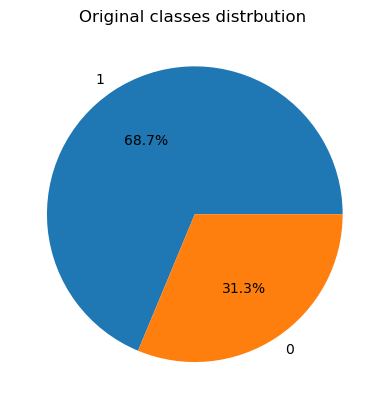

In [23]:
import matplotlib.pyplot as plt 
vc_y=Y.value_counts()

labels = vc_y.index.to_list()
labels
data = vc_y.values
plt.title('Original classes distrbution ')
plt.pie(vc_y,labels=labels,autopct='%0.1f%%')
plt.show()

In [26]:
from sklearn.utils import resample 



print('Before Resample', len(X)) # Use len(X) to print the total rows

df_0 = df[df['Loan_Status']==0]
df_1 = df[df['Loan_Status']==1]

# Get the number of samples in the majority class (df_1)
# You can use len() or .shape[0]
n_samples_for_upsampling = len(df_1)
# Or: n_samples_for_upsampling = df_1.shape[0]

# Upsample the minority class (df_0) to match the number of samples in df_1
df_0_upsample = resample(df_0, n_samples=n_samples_for_upsampling, replace=True, random_state=42) # Added random_state for reproducibility

df = pd.concat([df_1, df_0_upsample])

X = df.iloc[:,:-1]
Y = df.iloc[:,-1]
print('After Resample', len(X))


Before Resample 844
Before Resample 844
After Resample 844


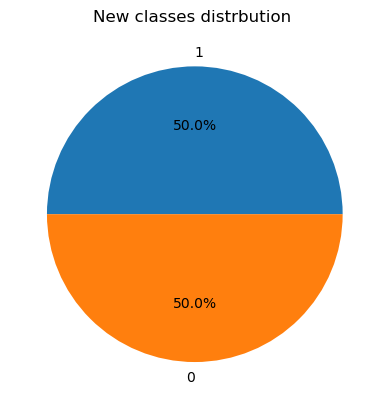

In [28]:
vc_y=Y.value_counts()

labels = vc_y.index.to_list()
labels
data = vc_y.values
plt.title('New classes distrbution ')
plt.pie(vc_y,labels=labels,autopct='%0.1f%%')
plt.show()

In [34]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(X,Y, test_size=.2 , random_state=42 )
print(len(X))
print(len(x_train))
print(len(x_test))


844
675
169


In [35]:
from sklearn.tree import DecisionTreeClassifier
model = DecisionTreeClassifier()
model.fit(x_train,y_train)

DecisionTreeClassifier()

In [36]:
y_pred = model.predict(x_test)

In [37]:
from sklearn import metrics 

cf = metrics.confusion_matrix(y_test,y_pred)
print("confusion_matrix:")
print(cf)


accuracy = metrics.accuracy_score(y_test,y_pred) 
precision = metrics.precision_score(y_test,y_pred) 
recall = metrics.recall_score(y_test,y_pred) 
f1_score = metrics.f1_score(y_test,y_pred)  


print(f'accuracy : {accuracy}')
print(f'precision : {precision}')
print(f'recall : {recall}')
print(f'f1_score : {f1_score}')

confusion_matrix:
[[84  1]
 [16 68]]
accuracy : 0.8994082840236687
precision : 0.9855072463768116
recall : 0.8095238095238095
f1_score : 0.8888888888888888


<Axes: >

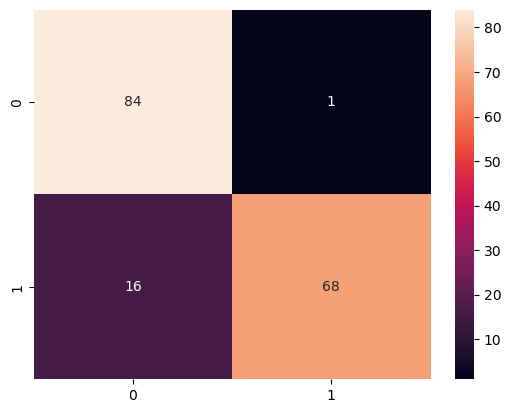

In [39]:
import seaborn as sns 
sns.heatmap(cf,annot=True)